In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DataSets /no_of_cases_adults_15_to_49_by_country_clean.csv')
df.head()


,Country,Year,Count,Count_median,Count_min,Count_max,WHO Region
0,Afghanistan,2018,0.1[0.1–0.1],0.1,0.1,0.1,Eastern Mediterranean
1,Albania,2018,na,NaN,NaN,NaN,Europe
2,Algeria,2018,0.1[0.1–0.1],0.1,0.1,0.1,Africa
3,Angola,2018,2.0[1.7–2.3],2.0,1.7,2.3,Africa
4,Argentina,2018,0.4[0.4–0.4],0.4,0.4,0.4,Americas


Checking data types and missing values at a glance.

In [ ]:
df.info()
df.describe(include='all')
# include='all' to get both numeric and categorical stats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       680 non-null    object 
 1   Year          680 non-null    int64  
 2   Count         680 non-null    object 
 3   Count_median  556 non-null    float64
 4   Count_min     556 non-null    float64
 5   Count_max     556 non-null    float64
 6   WHO Region    680 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 37.3+ KB


,Country,Year,Count,Count_median,Count_min,Count_max,WHO Region
count,680,680.000000,680,556.000000,556.000000,556.000000,680
unique,170,NaN,226,NaN,NaN,NaN,6
top,Afghanistan,NaN,0.1[0.1–0.1],NaN,NaN,NaN,Europe
freq,4,NaN,165,NaN,NaN,NaN,200
mean,NaN,2008.250000,NaN,2.029317,1.762770,2.303058,NaN
std,NaN,6.652261,NaN,4.579652,4.117482,4.976971,NaN
min,NaN,2000.000000,NaN,0.100000,0.100000,0.100000,NaN
25%,NaN,2003.750000,NaN,0.100000,0.100000,0.100000,NaN
50%,NaN,2007.500000,NaN,0.400000,0.300000,0.500000,NaN
75%,NaN,2012.000000,NaN,1.500000,1.200000,1.900000,NaN


##Project Title
- "Data-Driven Prediction and Mapping of HIV/AIDS Risk Factors in [Kenya or a chosen region]"

##Objectives
-Develop a machine learning model to predict the risk of HIV infection.

-Identify key demographic and behavioral risk factors associated with HIV.

-Visualize the geographic distribution of HIV/AIDS prevalence.

-Provide actionable insights for policymakers and healthcare organizations.



##Variable definations  


Country - The name of the country where HIV/AIDS data was collected. Example: Kenya, Nigeria, India.

Year - The year when the data was recorded. In your dataset, it appears to be from the year 2018.

Count -	A string combining the median, minimum, and maximum estimated number of new HIV infections (e.g., "2.0[1.7–2.3]"). This is a formatted version for easier human interpretation.

Count_median - The median estimated number of new HIV infections in the country for the given year. This is the most typical or central estimate.
- Count_median is being used as a proxy for HIV prevalence. HIV prevalence refers to the proportion of a population that is living with HIV at a given time
- Count_median is also our target for model building

Count_min - The minimum estimated number of new HIV infections — represents the lower bound of uncertainty.

Count_max - The maximum estimated number of new HIV infections — represents the upper bound of uncertainty.

WHO Region - The World Health Organization regional classification for the country. Examples: Africa, Europe, Eastern Mediterranean, Americas, etc. This helps in analyzing regional trends.

##STEP 1 : Data Preprocessing
Handle missing values

Normalize or scale numeric data




In [ ]:
# Drop rows with any missing values
df.dropna(inplace=True)

# Drop columns with many missing values
df.dropna(axis=1, inplace=True)


df.head()

,Country,Year,Count,Count_median,Count_min,Count_max,WHO Region
0,Afghanistan,2018,0.1[0.1–0.1],0.1,0.1,0.1,Eastern Mediterranean
2,Algeria,2018,0.1[0.1–0.1],0.1,0.1,0.1,Africa
3,Angola,2018,2.0[1.7–2.3],2.0,1.7,2.3,Africa
4,Argentina,2018,0.4[0.4–0.4],0.4,0.4,0.4,Americas
5,Armenia,2018,0.2[0.1–0.2],0.2,0.1,0.2,Europe


##STEP 2 : Exploratory Data Analysis (EDA)
- Purpose : Understand the patterns, relationships, and anomalies in the data.

In [ ]:
#Average and total of Count_median by WHO Region
df.groupby('WHO Region')['Count_median'].agg(['mean', 'sum', 'count']).sort_values(by='mean', ascending=False)


,mean,sum,count
WHO Region,,,
Africa,5.470455,962.8,176
Americas,0.921905,96.8,105
South-East Asia,0.457143,12.8,28
Western Pacific,0.302273,13.3,44
Eastern Mediterranean,0.226562,14.5,64
Europe,0.202158,28.1,139


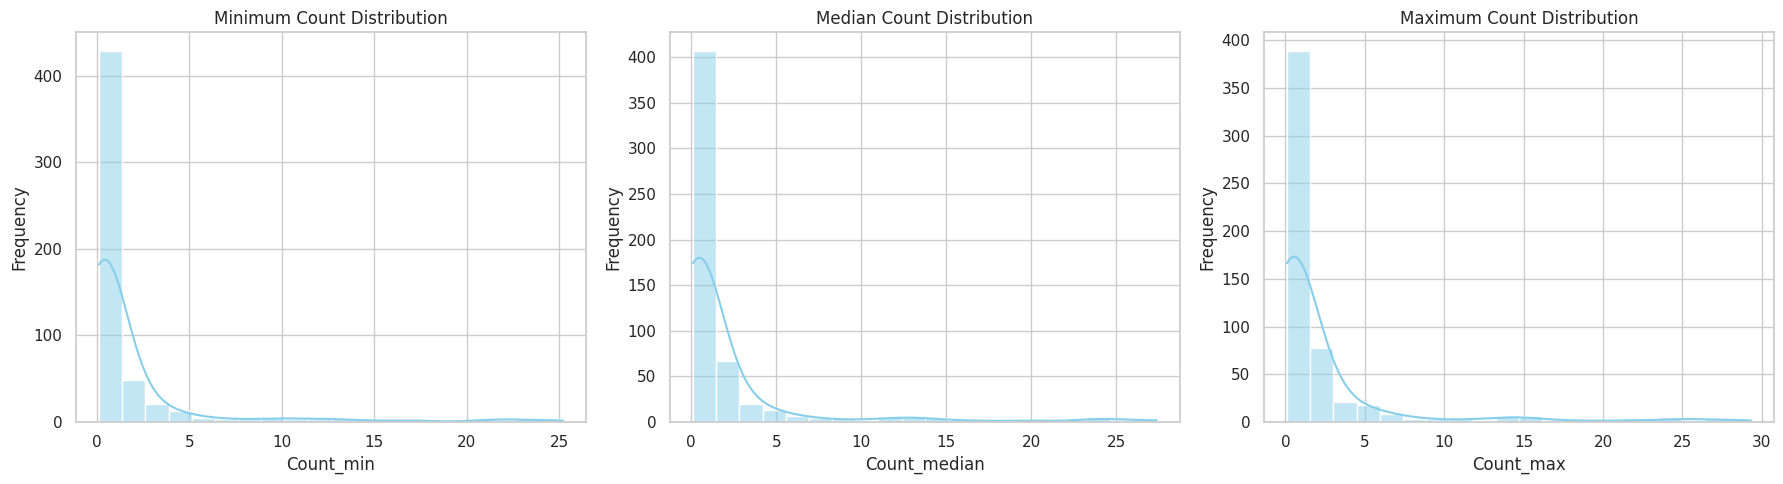

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/drive/MyDrive/DataSets /no_of_cases_adults_15_to_49_by_country_clean.csv"
df = pd.read_csv(file_path)

# Set plot style
sns.set(style="whitegrid")

# Create subplots for the three numeric columns
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Columns to plot
columns = ['Count_min', 'Count_median', 'Count_max']
titles = ['Minimum Count Distribution', 'Median Count Distribution', 'Maximum Count Distribution']

# Plot histograms with KDE
for ax, col, title in zip(axes, columns, titles):
    sns.histplot(df[col], bins=20, kde=True, ax=ax, color='skyblue')
    ax.set_title(title)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

# Adjust layout
plt.tight_layout()
plt.show()

##Heat Map of Missing Values according grouped by the WHO region


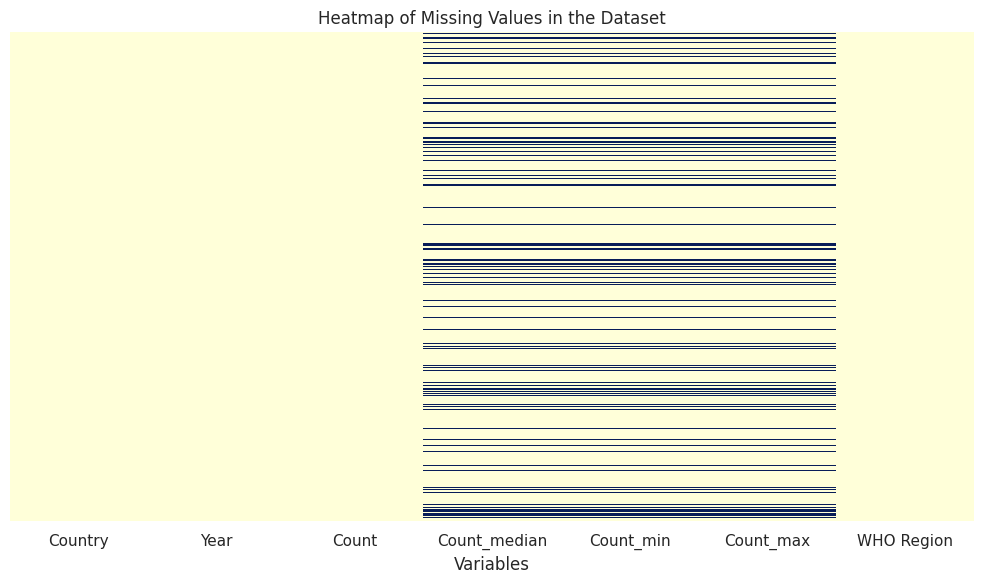

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#To see visually where the data is missing
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="YlGnBu", yticklabels=False)
plt.title("Heatmap of Missing Values in the Dataset")
plt.xlabel("Variables")
plt.tight_layout()
plt.show()

In [ ]:
#understand category distributions.
print(df['WHO Region'].value_counts())
print(df['Country'].value_counts().head(10))  # Top 10 most frequent


WHO Region
Europe                   200
Africa                   176
Americas                 120
Eastern Mediterranean     80
Western Pacific           64
South-East Asia           40
Name: count, dtype: int64
Country
Afghanistan    4
Albania        4
Algeria        4
Angola         4
Argentina      4
Armenia        4
Australia      4
Austria        4
Azerbaijan     4
Bahamas        4
Name: count, dtype: int64


In [ ]:
#Comparing correlation between numerical values
# Difference between max and min values
df['Count_range'] = df['Count_max'] - df['Count_min']
print(df[['Country', 'Count_range']].sort_values(by='Count_range', ascending=False).head())

          Country  Count_range
679      Zimbabwe          7.1
106    Mozambique          5.7
509      Zimbabwe          5.4
276    Mozambique          5.4
140  South Africa          5.1


####Creating a new column to show the general HIV count estimates for each country

In [ ]:
#Creating a new column to show the general HIV count estimates for each country.
df['range_percent'] = (df['Count_max'] - df['Count_min']) / df['Count_median'] * 100
df.head(10)

,Country,Year,Count,Count_median,Count_min,Count_max,WHO Region,Count_range,range_percent
0,Afghanistan,2018,0.1[0.1–0.1],0.1,0.1,0.1,Eastern Mediterranean,0.0,0.000000
1,Albania,2018,na,NaN,NaN,NaN,Europe,NaN,NaN
2,Algeria,2018,0.1[0.1–0.1],0.1,0.1,0.1,Africa,0.0,0.000000
3,Angola,2018,2.0[1.7–2.3],2.0,1.7,2.3,Africa,0.6,30.000000
4,Argentina,2018,0.4[0.4–0.4],0.4,0.4,0.4,Americas,0.0,0.000000
5,Armenia,2018,0.2[0.1–0.2],0.2,0.1,0.2,Europe,0.1,50.000000
6,Australia,2018,0.1[0.1–0.1],0.1,0.1,0.1,Western Pacific,0.0,0.000000
7,Austria,2018,na,NaN,NaN,NaN,Europe,NaN,NaN
8,Azerbaijan,2018,na,NaN,NaN,NaN,Europe,NaN,NaN
9,Bahamas,2018,1.8[1.5–1.9],1.8,1.5,1.9,Americas,0.4,22.222222


###Visualizing how HIV estimates change over time by country or region

<Axes: xlabel='Year'>

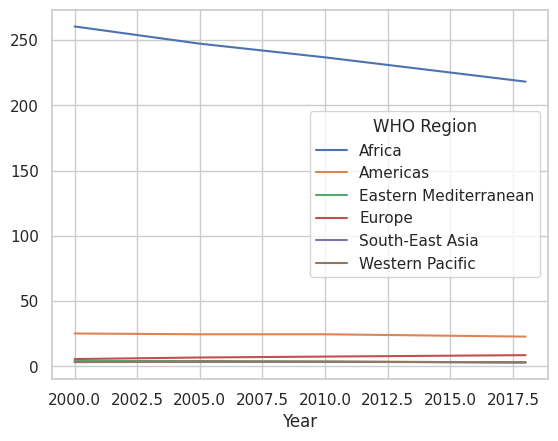

In [ ]:
df.groupby(['Year', 'WHO Region'])['Count_median'].sum().unstack().plot()


###Calculating the percentage of global HIV cases each country/region represent

In [ ]:
total_global = df['Count_median'].sum()
df['global_share_percent'] = (df['Count_median'] / total_global) * 10
df.head()


,Country,Year,Count,Count_median,Count_min,Count_max,WHO Region,Count_range,range_percent,global_share_percent
0,Afghanistan,2018,0.1[0.1–0.1],0.1,0.1,0.1,Eastern Mediterranean,0.0,0.0,0.000886
1,Albania,2018,na,NaN,NaN,NaN,Europe,NaN,NaN,NaN
2,Algeria,2018,0.1[0.1–0.1],0.1,0.1,0.1,Africa,0.0,0.0,0.000886
3,Angola,2018,2.0[1.7–2.3],2.0,1.7,2.3,Africa,0.6,30.0,0.017726
4,Argentina,2018,0.4[0.4–0.4],0.4,0.4,0.4,Americas,0.0,0.0,0.003545


##Using choropleth maps to visualize HIV risk geographically.

In [ ]:
#Using plotly
import plotly.express as px
fig = px.choropleth(df, locations='Country', locationmode='country names',
                    color='Count_median', title='Median Number of New Infections per year globally')
fig.show()



In [ ]:
#The script creates an interactive choropleth map — a world map where each country is shaded based on its average HIV prevalence
# Drop missing values for Count_median and group by Country
df_clean = df.dropna(subset=['Count_median'])

# Aggregate: average prevalence by country
country_avg = df_clean.groupby('Country', as_index=False)['Count_median'].mean()

# Create Choropleth map
fig = px.choropleth(
    country_avg,
    locations="Country",
    locationmode="country names",  # uses full country names
    color="Count_median",
    color_continuous_scale="Reds",
    title="Average HIV Prevalence by Country (Count_median)",
    labels={'Count_median': 'Avg. HIV Prevalence'}
)
#HIV prevalence refers to the proportion of a population that is living with HIV at a given time
# Show map
fig.show()

Trends or linear relationships using regression plots.

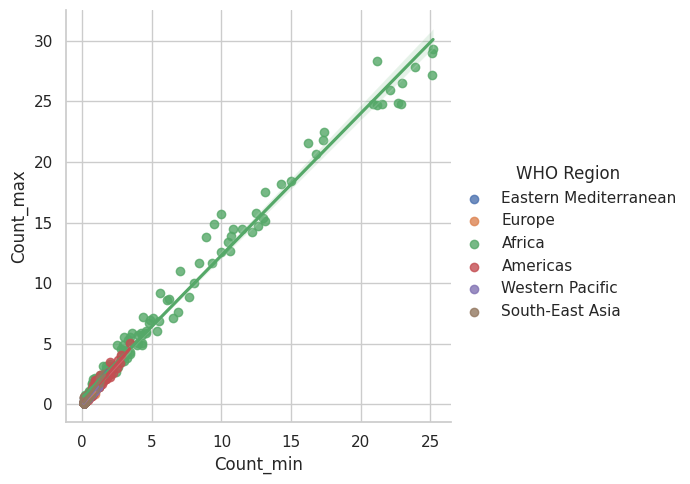

In [ ]:
sns.lmplot(data=df, x='Count_min', y='Count_max', hue='WHO Region')


#STEP 2 : Model Creation
- The model is based on  build a regression model to predict Count_median (HIV prevalence estimate)




Encoding categorical features (Country and WHO Region) using OneHotEncoder from scikit-learn.

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
#Uses OneHotEncoder via ColumnTransformer
#Leaves Year untouched as a numeric feature

df_clean = df.dropna(subset=['Count_median']).copy()

# Features to encode
categorical_features = ['Country', 'WHO Region']
numeric_features = ['Year']  # keeping numeric just in case

# Define column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # keep numeric columns like 'Year'
)

# Separate features and target
X = df_clean[categorical_features + numeric_features]
y = df_clean['Count_median']

# Apply transformation
X_encoded = preprocessor.fit_transform(X)

# Optional: get encoded feature names
encoded_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = list(encoded_feature_names) + numeric_features

# Convert to DataFrame if you want to inspect or export
X_encoded_df = pd.DataFrame(X_encoded.toarray(), columns=all_feature_names)

# Display first few rows
X_encoded_df.head()

,Country_Afghanistan,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Bahamas,Country_Bangladesh,Country_Barbados,Country_Belarus,...,Country_Yemen,Country_Zambia,Country_Zimbabwe,WHO Region_Africa,WHO Region_Americas,WHO Region_Eastern Mediterranean,WHO Region_Europe,WHO Region_South-East Asia,WHO Region_Western Pacific,Year
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2018.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2018.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2018.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2018.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2018.0


###Feature Selection
###Plan for Feature Selection
Correlation check for numeric features (like Year, Count_min, Count_max)

Model-based feature importance using Linear Regression with regularization (Lasso)


Correlation Matrix:
              Count_median  Count_min  Count_max      Year
Count_median      1.000000   0.998560   0.998337 -0.023985
Count_min         0.998560   1.000000   0.994288 -0.025681
Count_max         0.998337   0.994288   1.000000 -0.024853
Year             -0.023985  -0.025681  -0.024853  1.000000


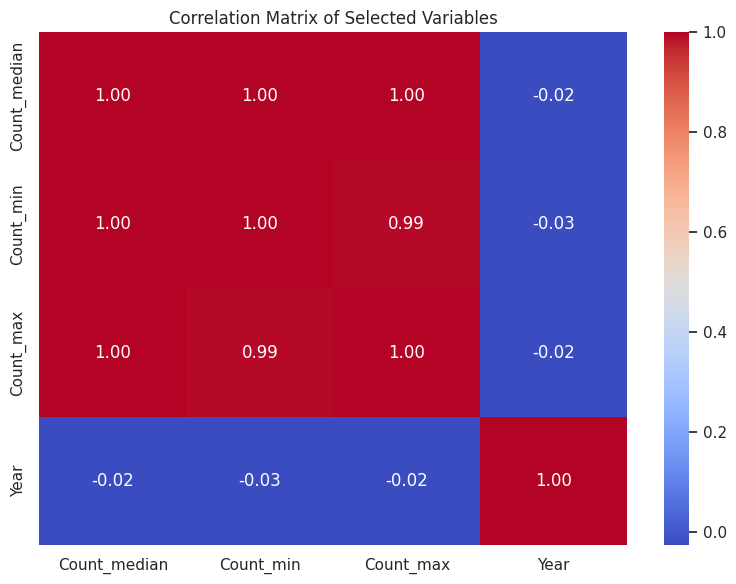

In [ ]:
#Correlation between variables
import matplotlib.pyplot as plt

# Keep only numeric columns you're interested in
numeric_cols = ['Count_median', 'Count_min', 'Count_max', 'Year']

# Drop rows with missing values in those columns
df_corr = df[numeric_cols].dropna()

# Compute correlation matrix
corr_matrix = df_corr.corr()

# Print the matrix (optional)
print("Correlation Matrix:")
print(corr_matrix)

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Selected Variables")
plt.tight_layout()
plt.show()


 Therefore Count_min and Count_max are the strongest predictors

##Model creation using Linear regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# === FEATURES AND TARGET ===
features = ['Year', 'Count_min', 'Count_max']
target = 'Count_median' #HIV prevalance

X = df_clean[features]
y = df_clean[target]

# === SPLIT DATA ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === CREATE PIPELINE (SCALING + MODEL) ===
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

# === TRAIN MODEL ===
pipeline.fit(X_train, y_train)

# === MAKE PREDICTIONS ===
y_pred = pipeline.predict(X_test)

# === EVALUATE MODEL ===
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# === PRINT RESULTS ===
print(f"Linear Regression Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R² Score: {r2:.2%}")

Linear Regression Model Performance:
Mean Absolute Error (MAE): 0.041
Root Mean Squared Error (RMSE): 0.070
R² Score: 99.96%


##Plotting actual vs Predicted values


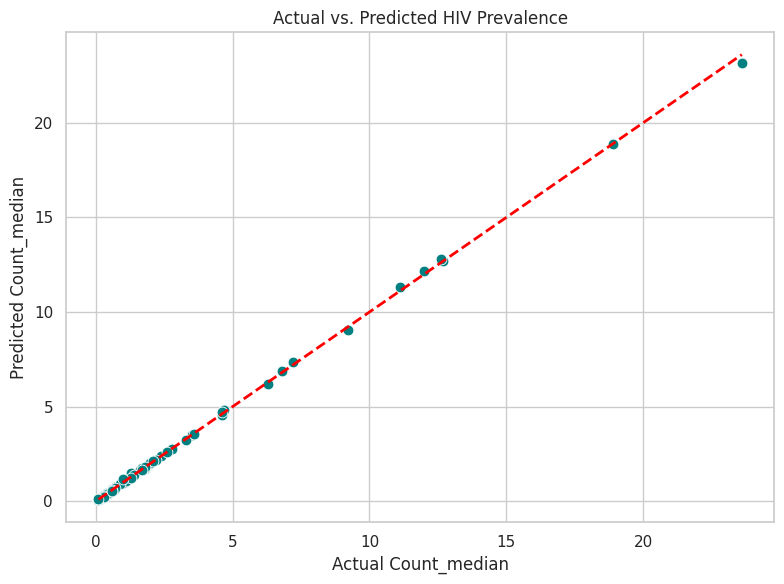

In [ ]:
# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='teal', s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='--')
plt.title('Actual vs. Predicted HIV Prevalence')
plt.xlabel('Actual Count_median')
plt.ylabel('Predicted Count_median')
plt.grid(True)
plt.tight_layout()
plt.show()

From the above analyzation :
- Each dot is a country-year.

- The red dashed line is the "perfect prediction" line.

- All dots lie near the perfect prediction line hence it is an almost perfect model

- Deviations show where the model under- or over-predicts.

In [ ]:
import pickle

with open('pipeline.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

In [ ]:
X_test.iloc[0]

,560
Year,2000.0
Count_min,0.5
Count_max,0.7


In [ ]:
import warnings

warnings.filterwarnings("ignore")

In [ ]:
input_values = X_test.iloc[0]
test_values = input_values.values.reshape(1, -1)

pipeline.predict(test_values)

array([0.58091139])